In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

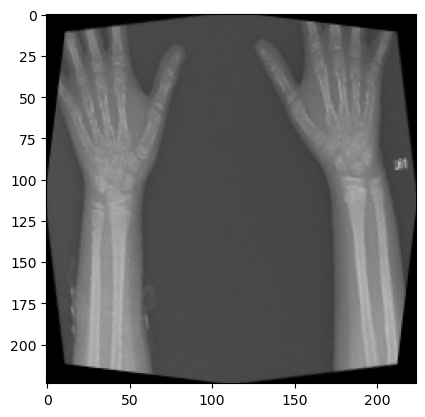

In [19]:
# Read the input image
input_image_path = "10-rotated1-rotated1.jpg"
frame = cv2.imread(input_image_path)
plt.imshow(frame)

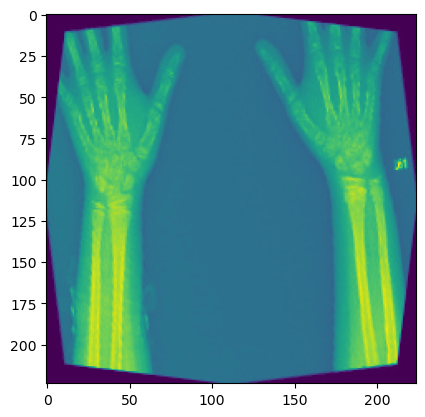

In [17]:
# Convert the frame to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

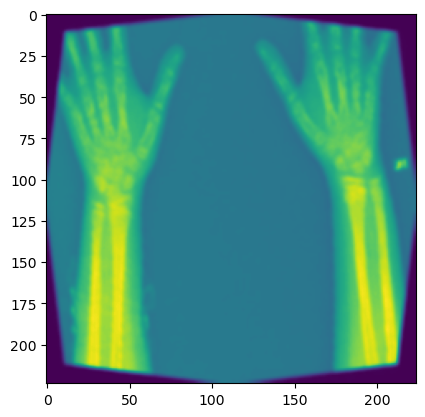

In [20]:
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred)

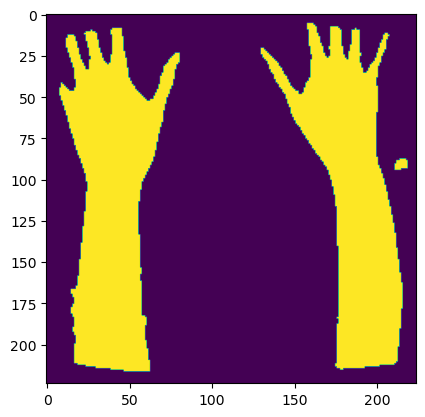

In [22]:
# Apply thresholding to segment the image
_, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresholded)

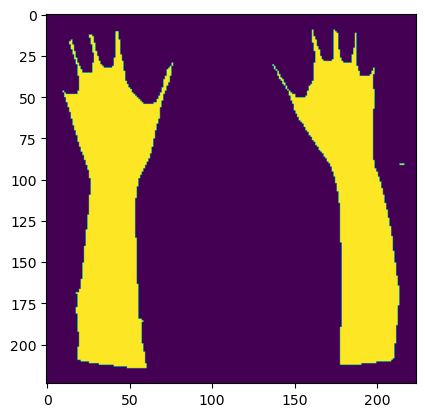

In [13]:
# Apply erosion to further remove noise and thin the features
kernel_erosion = np.ones((5, 5), np.uint8)
eroded = cv2.erode(thresholded, kernel_erosion, iterations=1)
plt.imshow(eroded)

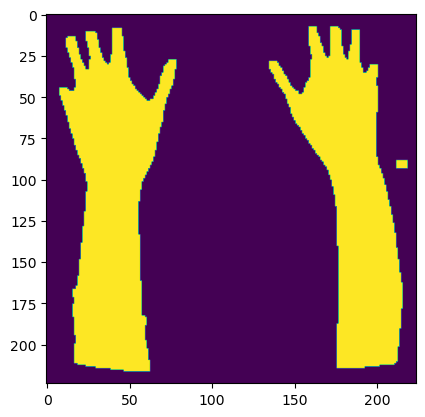

In [14]:
# Apply dilation to close small gaps and connect nearby features
kernel_dilation = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(eroded, kernel_dilation, iterations=1)
plt.imshow(dilated)

In [26]:
# Find contours of potential fractures
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [27]:
# Draw contours on the original frame
result = frame.copy()
cv2.drawContours(result, contours, -1, (0, 255, 0), 2)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
# Display the result
cv2.imshow('Fracture Detection', result)
cv2.waitKey(0)
cv2.destroyAllWindows()